In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from KUtils.eda import chartil

In [2]:
# Show all column in head()
pd.set_option('display.max_columns', None)

In [3]:
import pickle
# Load
with open('model_iteration_info.pickle', 'rb') as filehandle:
     model_iteration_info = pickle.load(filehandle)

In [4]:
print(model_iteration_info['Group'].unique())
print(model_iteration_info['Dataset'].unique())
print(model_iteration_info['Filter'].unique())
print(model_iteration_info['Model'].unique())

['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7']
['Full' 'TopTweets' 'TopFewCompany']
['None' 'Follower>1K' 'Freshness<2 & Follower>1K' '5dAvgVol>1'
 'NoOfImpWords>=2' 'Freshness<2 & Follower>5K'
 '5dAvgVol>1 & NoOfImpWords>=2']
['RF' 'GNB' 'MNB' 'BNB' 'XGB']


In [35]:
model_iteration_info.head(-1)

,Group,Dataset,Filter,Model,TN,FP,FN,TP,Accuracy,Sensitivity,Specificity,Precision,Recall,F1,AUC,MCC,Long_gain_mean,Short_gain_mean,Test_size,Train_size,TotalAvgProfit
0,G1,Full,None,RF,2920,764,241,9546,0.925395,0.975375,0.792617,0.925897,0.975375,0.949993,0.883996,0.807793,1.547581,-1.389691,13471,31432,1.51053
1,G1,Full,None,GNB,3466,218,5420,4367,0.581471,0.446204,0.940825,0.952454,0.446204,0.607709,0.693515,0.364087,1.653015,-1.506540,13471,31432,1.55639
2,G1,Full,None,MNB,2308,1376,138,9649,0.887610,0.985900,0.626493,0.875193,0.985900,0.927254,0.806196,0.708104,1.555652,-1.372260,13471,31432,1.52235
3,G1,Full,None,BNB,3200,484,587,9200,0.920496,0.940022,0.868621,0.950021,0.940022,0.944995,0.904322,0.801801,1.565527,-1.415014,13471,31432,1.52321
4,G1,Full,None,XGB,3266,418,214,9573,0.953084,0.978134,0.886536,0.958162,0.978134,0.968045,0.932335,0.880524,1.547632,-1.384274,13471,31432,1.50543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,G6,TopFewCompany,Freshness<2 & Follower>5K,XGB,121,64,30,454,0.859492,0.938017,0.654054,0.876448,0.938017,0.906188,0.796035,0.633474,1.819400,-1.795145,669,1561,1.81393
100,G7,TopFewCompany,5dAvgVol>1 & NoOfImpWords>=2,RF,17,124,0,516,0.811263,1.000000,0.120567,0.806250,1.000000,0.892734,0.560284,0.311781,1.649134,-1.969336,657,1533,1.65742
101,G7,TopFewCompany,5dAvgVol>1 & NoOfImpWords>=2,GNB,92,49,64,452,0.828006,0.875969,0.652482,0.902196,0.875969,0.888889,0.764226,0.509869,1.694633,-2.081576,657,1533,1.78651
102,G7,TopFewCompany,5dAvgVol>1 & NoOfImpWords>=2,MNB,16,125,0,516,0.809741,1.000000,0.113475,0.804992,1.000000,0.891962,0.556738,0.302236,1.659270,-2.869688,657,1533,1.68875


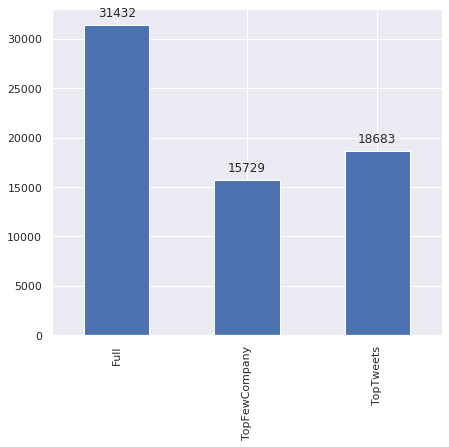

In [44]:
# Dataset size
groupBy = model_iteration_info.groupby(['Dataset'])
chartil.core_barchart_from_series(groupBy['Train_size'].max())

In [34]:
groupBydatasetFilter = model_iteration_info.groupby(['Dataset', 'Filter']) 
groupBydatasetFilter['F1', 'AUC', 'MCC', 'TotalAvgProfit'].max()

F1       AUC       MCC  \
Dataset       Filter                                                       
Full          5dAvgVol>1                    0.953972  0.905277  0.831147   
              5dAvgVol>1 & NoOfImpWords>=2  0.953050  0.869478  0.760744   
              Follower>1K                   0.940099  0.886139  0.789978   
              Freshness<2 & Follower>1K     0.942973  0.891354  0.796038   
              Freshness<2 & Follower>5K     0.926362  0.867178  0.721584   
              NoOfImpWords>=2               0.968559  0.919758  0.859813   
              None                          0.968045  0.932335  0.880524   
TopFewCompany 5dAvgVol>1                    0.936929  0.865487  0.755401   
              5dAvgVol>1 & NoOfImpWords>=2  0.920755  0.774287  0.596802   
              Follower>1K                   0.912252  0.848420  0.711973   
              Freshness<2 & Follower>1K     0.898848  0.808966  0.656839   
              Freshness<2 & Follower>5K     0.906188  0.796035  0.633474   
              NoOfImpWords>=2               0.938427  0.836702  0.714822   
              None                          0.955212  0.905641  0.833324   
TopTweets     5dAvgVol>1                    0.942063  0.875166  0.777870   
              5dAvgVol>1 & NoOfImpWords>=2  0.932379  0.815173  0.657323   
              Follower>1K                   0.925423  0.860218  0.735152   
              Freshness<2 & Follower>1K     0.926726  0.871632  0.745971   
              Freshness<2 & Follower>5K     0.915718  0.790538  0.643752   
              NoOfImpWords>=2               0.956522  0.888450  0.790216   
              None                          0.959783  0.913810  0.848996   

                                            TotalAvgProfit  
Dataset       Filter                                        
Full          5dAvgVol>1                          1.554868  
              5dAvgVol>1 & NoOfImpWords>=2        1.496175  
              Follower>1K                         1.547974  
              Freshness<2 & Follower>1K           1.505526  
              Freshness<2 & Follower>5K           1.510560  
              NoOfImpWords>=2                     1.462483  
              None                                1.556394  
TopFewCompany 5dAvgVol>1                          1.820965  
              5dAvgVol>1 & NoOfImpWords>=2        1.786510  
              Follower>1K                         1.710751  
              Freshness<2 & Follower>1K           1.749483  
              Freshness<2 & Follower>5K           1.813926  
              NoOfImpWords>=2                     1.621606  
              None                                1.780000  
TopTweets     5dAvgVol>1                          1.807621  
              5dAvgVol>1 & NoOfImpWords>=2        1.563612  
              Follower>1K                         1.675812  
              Freshness<2 & Follower>1K           1.779089  
              Freshness<2 & Follower>5K           1.890269  
              NoOfImpWords>=2                     1.629782  
              None                                1.791752

In [33]:
groupBydatasetFilter = model_iteration_info.groupby(['Dataset', 'Model']) 
groupBydatasetFilter['F1', 'AUC', 'MCC', 'TotalAvgProfit'].max()

F1       AUC       MCC  TotalAvgProfit
Dataset       Model                                              
Full          BNB    0.956789  0.904322  0.809441        1.554868
              GNB    0.837300  0.742245  0.431156        1.556394
              MNB    0.930836  0.806196  0.708104        1.552370
              RF     0.949993  0.883996  0.807793        1.535055
              XGB    0.968559  0.932335  0.880524        1.539735
TopFewCompany BNB    0.940659  0.889930  0.784310        1.809815
              GNB    0.888889  0.764226  0.509869        1.809589
              MNB    0.916405  0.776001  0.664089        1.820965
              RF     0.937059  0.843410  0.755991        1.799099
              XGB    0.955212  0.905641  0.833324        1.813926
TopTweets     BNB    0.945191  0.894228  0.784728        1.797727
              GNB    0.854254  0.726662  0.406079        1.821767
              MNB    0.918544  0.770030  0.660373        1.824547
              RF     0.940168  0.849698  0.766203        1.825175
              XGB    0.959783  0.913810  0.848996        1.890269

In [36]:
groupBydatasetFilter = model_iteration_info.groupby(['Filter', 'Model']) 
groupBydatasetFilter['F1', 'AUC', 'MCC', 'TotalAvgProfit'].max()

F1       AUC       MCC  \
Filter                       Model                                 
5dAvgVol>1                   BNB    0.939087  0.888111  0.781224   
                             GNB    0.721665  0.701606  0.357454   
                             MNB    0.910132  0.756189  0.640939   
                             RF     0.939012  0.855682  0.768302   
                             XGB    0.953972  0.905277  0.831147   
5dAvgVol>1 & NoOfImpWords>=2 BNB    0.953050  0.840056  0.760744   
                             GNB    0.888889  0.764226  0.509869   
                             MNB    0.912863  0.650099  0.495918   
                             RF     0.931448  0.749906  0.629571   
                             XGB    0.948128  0.869478  0.751203   
Follower>1K                  BNB    0.919385  0.869848  0.731603   
                             GNB    0.705248  0.690354  0.351074   
                             MNB    0.896974  0.742970  0.601089   
                             RF     0.928179  0.838084  0.737043   
                             XGB    0.940099  0.886139  0.789978   
Freshness<2 & Follower>1K    BNB    0.921188  0.874143  0.734504   
                             GNB    0.717346  0.701026  0.374467   
                             MNB    0.908667  0.760060  0.642177   
                             RF     0.927293  0.831112  0.725326   
                             XGB    0.942973  0.891354  0.796038   
Freshness<2 & Follower>5K    BNB    0.921840  0.867178  0.721584   
                             GNB    0.785325  0.739894  0.431156   
                             MNB    0.904494  0.722378  0.597624   
                             RF     0.913290  0.750747  0.641554   
                             XGB    0.926362  0.851320  0.720100   
NoOfImpWords>=2              BNB    0.956789  0.899819  0.809441   
                             GNB    0.831118  0.742245  0.421345   
                             MNB    0.930836  0.756189  0.661245   
                             RF     0.947079  0.831899  0.750132   
                             XGB    0.968559  0.919758  0.859813   
None                         BNB    0.944995  0.904322  0.801801   
                             GNB    0.607709  0.693515  0.364087   
                             MNB    0.927254  0.806196  0.708104   
                             RF     0.949993  0.883996  0.807793   
                             XGB    0.968045  0.932335  0.880524   

                                    TotalAvgProfit  
Filter                       Model                  
5dAvgVol>1                   BNB          1.809815  
                             GNB          1.809589  
                             MNB          1.820965  
                             RF           1.796861  
                             XGB          1.778414  
5dAvgVol>1 & NoOfImpWords>=2 BNB          1.721077  
                             GNB          1.786510  
                             MNB          1.688748  
                             RF           1.657420  
                             XGB          1.637696  
Follower>1K                  BNB          1.636062  
                             GNB          1.710751  
                             MNB          1.624945  
                             RF           1.634563  
                             XGB          1.662139  
Freshness<2 & Follower>1K    BNB          1.691365  
                             GNB          1.779089  
                             MNB          1.659800  
                             RF           1.667610  
                             XGB          1.722046  
Freshness<2 & Follower>5K    BNB          1.797727  
                             GNB          1.821767  
                             MNB          1.824547  
                             RF           1.825175  
                             XGB          1.890269  
NoOfImpWords>=2              BNB          1.617427  
                             GNB         

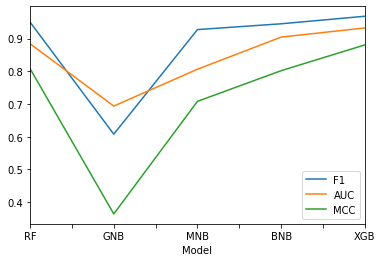

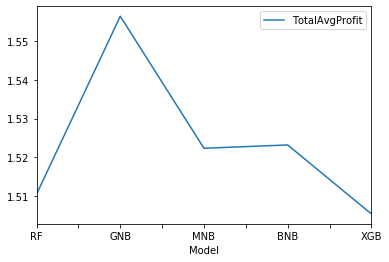

In [17]:
chart_df = model_iteration_info.loc[(model_iteration_info['Dataset']=='Full') & (model_iteration_info['Filter']=='None') ]
chart_df.plot.line(x='Model', y=['F1', 'AUC', 'MCC'])
plt.show()
chart_df.plot.line(x='Model', y=['TotalAvgProfit'])
plt.show()

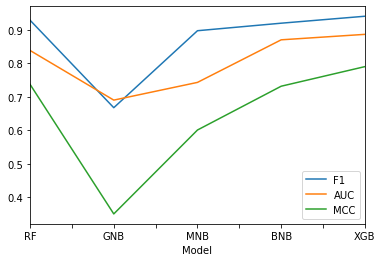

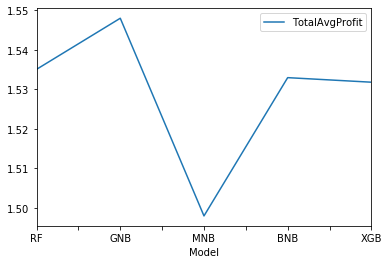

In [22]:
chart_df = model_iteration_info.loc[(model_iteration_info['Dataset']=='Full') & (model_iteration_info['Filter']=='Follower>1K') ]
chart_df.plot.line(x='Model', y=['F1', 'AUC', 'MCC'])
plt.show()
chart_df.plot.line(x='Model', y=['TotalAvgProfit'])
plt.show()

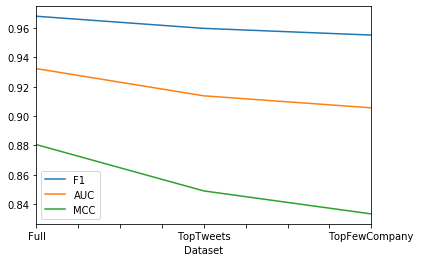

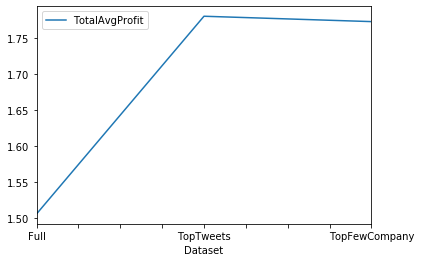

In [21]:
chart_df = model_iteration_info.loc[(model_iteration_info['Model']=='XGB') & (model_iteration_info['Filter']=='None') ]
chart_df.plot.line(x='Dataset', y=['F1', 'AUC', 'MCC'])
plt.show()
chart_df.plot.line(x='Dataset', y=['TotalAvgProfit'])
plt.show()

In [19]:
chart_df.head()

,Group,Dataset,Filter,Model,TN,FP,FN,TP,Accuracy,Sensitivity,Specificity,Precision,Recall,F1,AUC,MCC,Long_gain_mean,Short_gain_mean,Test_size,Train_size,TotalAvgProfit
4,G1,Full,None,XGB,3266,418,214,9573,0.953084,0.978134,0.886536,0.958162,0.978134,0.968045,0.932335,0.880524,1.547632,-1.384274,13471,31432,1.50543
39,G1,TopTweets,None,XGB,1877,321,153,5656,0.940802,0.973662,0.853958,0.946294,0.973662,0.959783,0.913810,0.848996,1.847125,-1.585970,8007,18683,1.78092
74,G1,TopFewCompany,None,XGB,1574,297,146,4724,0.934283,0.970021,0.841261,0.940848,0.970021,0.955212,0.905641,0.833324,1.860329,-1.519805,6741,15729,1.77344


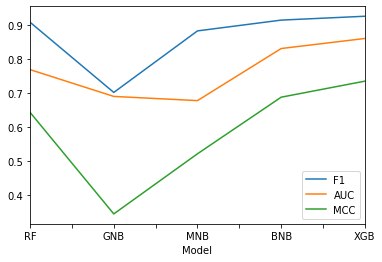

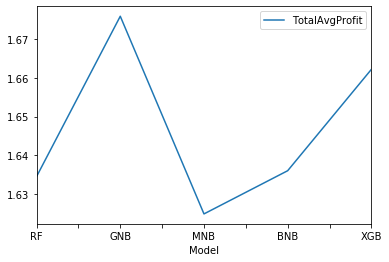

In [24]:
chart_df = model_iteration_info.loc[(model_iteration_info['Dataset']=='TopTweets') & (model_iteration_info['Filter']=='Follower>1K') ]
chart_df.plot.line(x='Model', y=['F1', 'AUC', 'MCC'])
plt.show()
chart_df.plot.line(x='Model', y=['TotalAvgProfit'])
plt.show()